<a href="https://colab.research.google.com/github/musical-shyam/CS-536---ML-Projects-/blob/main/Assignment%201/Ford_Car_Price_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 536 Intro To ML: Assignment 1**

## **Importing the Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Data Preprocessing**

### Inputing the Data

In [2]:
# The Dataset
# Years are the Features. Min and Max prices are the Labels for the Model.
year = np.array([2024, 2023, 2022, 2021, 2020, 2019, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992])
cost_low = np.array([32720, 27400, 25980, 24820, 24110, 24000, 18160, 17820, 16395, 14490, 13970, 14450, 14610, 14575, 13645, 12565, 11960, 11580, 11845, 11485, 11070, 10575, 10224, 9449, 8782, 8730])
cost_high = np.array([55620, 40945, 39730, 39035, 38675, 38565, 26070, 25800, 25805, 24350, 24425, 26670, 26795, 26015, 25450, 25010, 24335, 19785, 19435, 19695, 20325, 20295, 19571, 18328, 16535, 14840])

# Printing the Data that we have in a tabular format
print(pd.DataFrame({'Year': year, 'Minimum Cost': cost_low, 'Maximum Cost': cost_high}).to_string(index=False))
print()

 Year  Minimum Cost  Maximum Cost
 2024         32720         55620
 2023         27400         40945
 2022         25980         39730
 2021         24820         39035
 2020         24110         38675
 2019         24000         38565
 2011         18160         26070
 2010         17820         25800
 2009         16395         25805
 2008         14490         24350
 2007         13970         24425
 2006         14450         26670
 2005         14610         26795
 2004         14575         26015
 2003         13645         25450
 2002         12565         25010
 2001         11960         24335
 2000         11580         19785
 1999         11845         19435
 1998         11485         19695
 1997         11070         20325
 1996         10575         20295
 1995         10224         19571
 1994          9449         18328
 1993          8782         16535
 1992          8730         14840



### Normalizing the Data

In [3]:
# Normalizing Feature using mean and stand deviation
normalized_year = (year - np.mean(year)) / np.std(year)

### Fixing the Hyperparameters

In [4]:
# Setting the Hyperparameters
learning_rate = 0.1 # This is the initial Learning rate
c = 9
batch_size = year.size # Each Batch is going to have the entire dataset
epochs = 100 # Number of Iterations
lambda_ = 0.1 # Regularization parameter

### Fixing Random Weights

In [5]:
# Generating Random weights between 0 and 1
low_weight = np.random.uniform(0, 1)
high_weight = np.random.uniform(0, 1)
low_bias = np.random.uniform(0, 1)
high_bias = np.random.uniform(0, 1)


# Printing the Randomly Generated Weights
print(low_weight, low_bias)
print(high_weight, high_bias)

0.48286547307880034 0.16153184707284407
0.5276799634408234 0.9259737858693047


## **Linear Regression Model**

### Objective Function :- Mean Squared Error

In [6]:
# This Function Takes all the predicted prices and true prices to calculate the mean squared error for the epoch
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Regularization Penaltly :- L1 and L2 Penalty

In [7]:
def L1_Penalty(w):
    return np.sum(np.abs(w))
def L2_Penalty(w):
    return np.sum(w ** 2)

### Model Function :- Predicated_Label = Input * Weight + Bias

In [8]:
# This Function takes all the years as an array and the weights as inputs and returns all the Predicted Costs for each year in the form of an array
def linear_regression(x, w, b):
    y = w * x + b
    return y

### Optimization Algorithm :- Stochastic Gradient Descent

In [9]:
# This function takes all required values to perform SDG
# This function returns the updated weights and the Loss
# depending the needed
def sgd(x, y, y_pred, w, b, lr):
    grad_w = np.mean(x * (y_pred - y)) #+ lambda_ * L1_Penalty(w)
    grad_b = np.mean(y_pred - y)
    w -= lr * grad_w
    b -= lr * grad_b
    loss = mean_squared_error(y, y_pred) #+ lambda_ * L1_Penalty
    return w, b, loss

### The Training Function

In [10]:
def Train_Model(x, y, w, b, lr, epochs, dynamic):
    loss = []
    if dynamic:
      for epoch in range(epochs):
          y_pred = linear_regression(x, w, b)
          w, b, current_loss = sgd(x, y, y_pred, w, b, lr)
          loss.append(current_loss)
          lr *= c/(1+c*epoch)
    else:
      for epoch in range(epochs):
          y_pred = linear_regression(x, w, b)
          w, b, current_loss = sgd(x, y, y_pred, w, b, lr)
          loss.append(current_loss)
    return w, b, loss, y_pred

## **Data Visualization Functions**

### Function for Plotting the Feature vs. Label graph

In [11]:
def plot_graph(x, y, y_pred, ylabel):
    plt.scatter(x, y, label = 'True cost values')
    plt.plot(x, y_pred, color='red')
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(ylabel + ' vs. Release Year')
    plt.show()

### Function for Plotting the Loss Curve

In [12]:
def plot_loss_curve(loss, label):
    plt.plot(loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve for ' + label )
    plt.show()

## **Plotting Linear Regression Graph and Loss Curve Graph for Minimum Car Cost**

### Model without Dynamic Learning Rate and Feature Scaling

<ipython-input-6-4452f6a47d76>:3: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


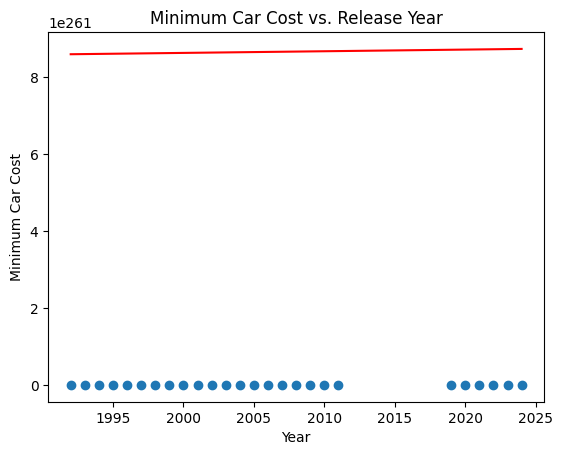

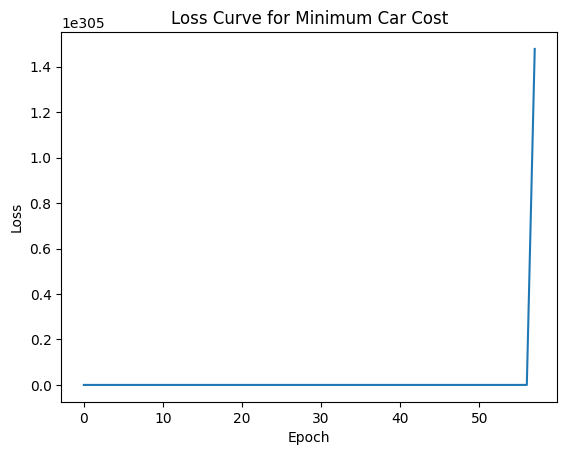

theta_1 =  -1.733999332307999e+261 theta_0 =  -8.643358417238246e+257


In [13]:
#Reducing the Learning rate for a proper result
low_weight, low_bias, loss, y_pred = Train_Model(year, cost_low, low_weight, low_bias, 0.0001, epochs, False)
plot_graph(year, cost_low, y_pred, 'Minimum Car Cost')
plot_loss_curve(loss, 'Minimum Car Cost')
print ("theta_1 = ", low_weight, "theta_0 = ", low_bias)

### Model with Dynamic Learning Rate and Feature Scaling

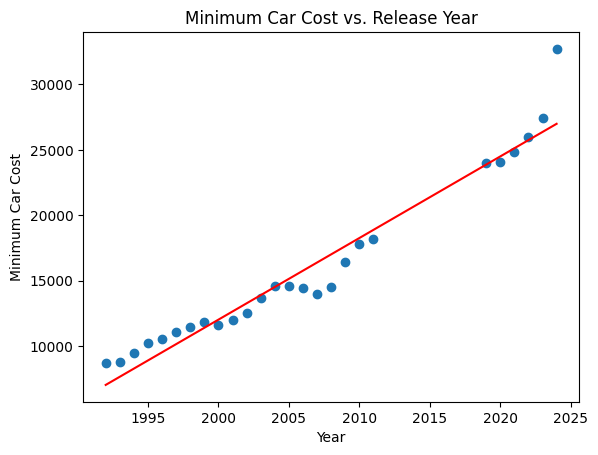

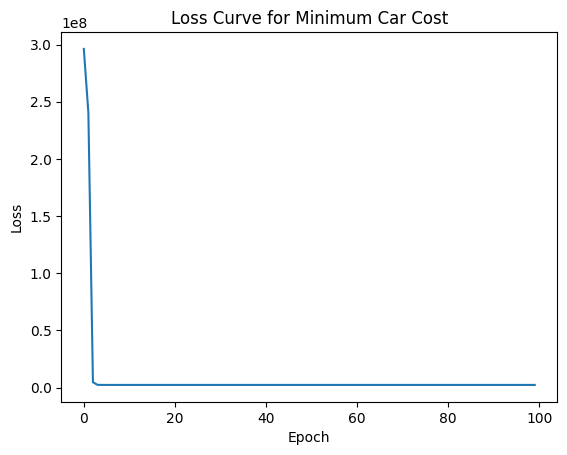

theta_1 =  6153.2732967089 theta_0 =  15835.116638313482


In [14]:
# Randomizing the weights again for fair comparison
low_weight = np.random.uniform(0, 1)
low_bias = np.random.uniform(0, 1)

low_weight, low_bias, loss, y_pred = Train_Model(normalized_year, cost_low, low_weight, low_bias, learning_rate, epochs, True)
plot_graph(year, cost_low, y_pred, 'Minimum Car Cost')
plot_loss_curve(loss, 'Minimum Car Cost')
print ("theta_1 = ", low_weight, "theta_0 = ", low_bias)

## **Plotting Linear Regression Graph and Loss Curve Graph for Maximum Car Cost**

### Model without Dynamic Learning Rate and Feature Scaling

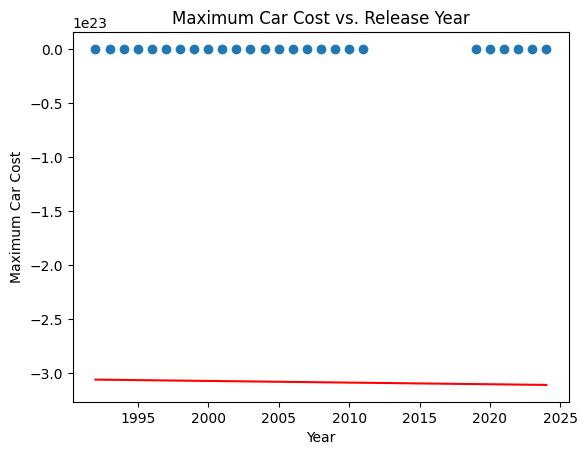

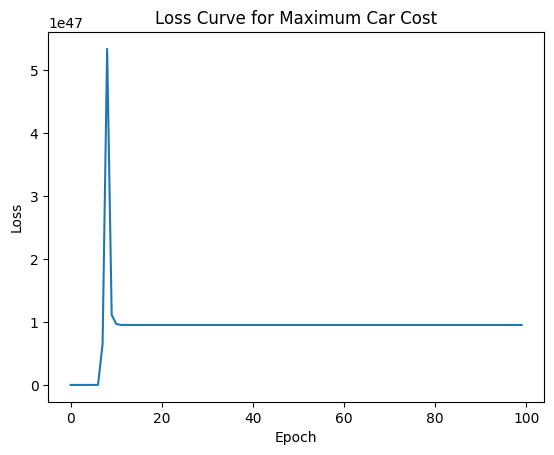

theta_1 =  -1.537738579642638e+20 theta_0 =  -7.665069673455531e+16


In [15]:
# Reducing the Learning Rate for proper results
high_weight, high_bias, loss, y_pred = Train_Model(year, cost_high, high_weight, high_bias, 0.0001, epochs, True)
plot_graph(year, cost_high, y_pred, 'Maximum Car Cost')
plot_loss_curve(loss, 'Maximum Car Cost')
print ("theta_1 = ", high_weight, "theta_0 = ", high_bias)


### Model with Dynamic Learning Rate and Feature Scaling

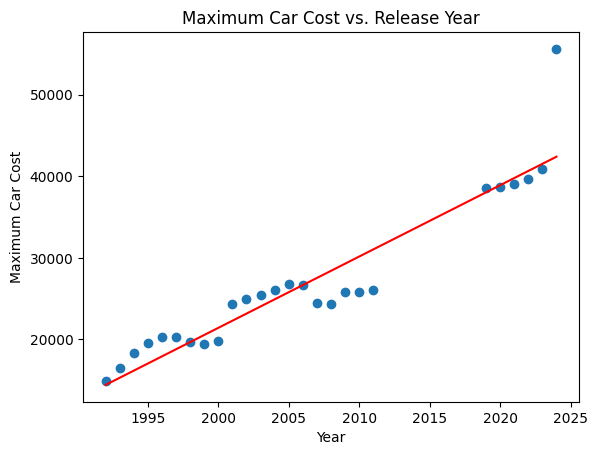

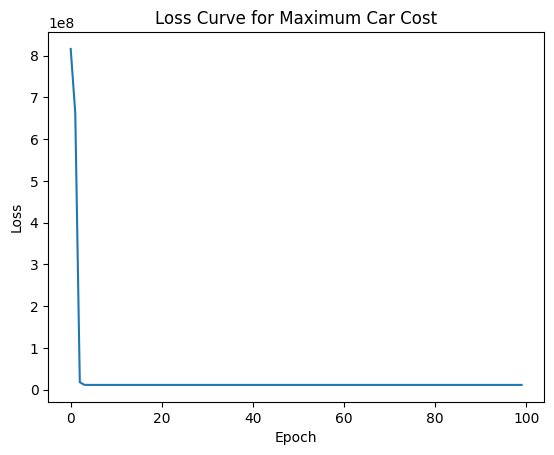

theta_1 =  8624.679198737478 theta_0 =  26763.684657725247


In [16]:
# Randomizing the weights again for fair comparison
high_weight = np.random.uniform(0, 1)
high_bias = np.random.uniform(0, 1)

high_weight, high_bias, loss, y_pred = Train_Model(normalized_year, cost_high, high_weight, high_bias, learning_rate, epochs, True)
plot_graph(year, cost_high, y_pred, 'Maximum Car Cost')
plot_loss_curve(loss, 'Maximum Car Cost')
print ("theta_1 = ", high_weight, "theta_0 = ", high_bias)

### Car Cost Range Prediction for the Missing Years (2012 - 2018)

In [17]:
Predict_Years = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018])
normalized_predict_years = (Predict_Years - np.mean(year)) / np.std(year)

low_predict = linear_regression(normalized_predict_years, low_weight, low_bias)
high_predict = linear_regression(normalized_predict_years, high_weight, high_bias)

print(pd.DataFrame({'Year': Predict_Years, 'Minimum Cost': low_predict, 'Maximum Cost': high_predict}).to_string(index=False))

 Year  Minimum Cost  Maximum Cost
 2012  19506.808870  31910.078469
 2013  20130.756569  32784.629051
 2014  20754.704268  33659.179633
 2015  21378.651968  34533.730215
 2016  22002.599667  35408.280798
 2017  22626.547367  36282.831380
 2018  23250.495066  37157.381962


### Car Cost Range Prediction for the Year 2025

In [19]:
Predict_Year = np.array([2025])
normalized_predict_year = (Predict_Year - np.mean(year)) / np.std(year)

low_predict = linear_regression(normalized_predict_year, low_weight, low_bias)
high_predict = linear_regression(normalized_predict_year, high_weight, high_bias)

print(pd.DataFrame({'Year': Predict_Year, 'Minimum Cost': low_predict, 'Maximum Cost': high_predict}).to_string(index=False))

 Year  Minimum Cost  Maximum Cost
 2025  27618.128962  43279.236038
